# Разведочный анализ данных (Exploratory Data Analysis)

На семинаре продолжим работать с данными о пассажирах Титаника.

Цели:
* познакомиться с библиотекой seaborn
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

In [158]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Matplotlib

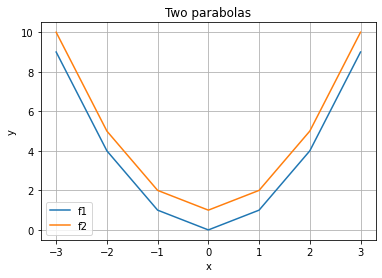

In [159]:
# !Графики обязательно должны иметь заголовки!
# !На графиках обязательно должны быть подписаны оси!
# При взгляде на график должно быть понятно, что на нём изображено, без необходимости смотреть код

x = np.array([-3, -2, -1, 0, 1, 2, 3])
y = x ** 2
plt.title('Two parabolas')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
# plt.plot – линейный график
_ = plt.plot(x, y, label = 'f1') # _ = ... – matplotlib выводит график и возвращает сообщение о построении графика,
# чтобы оно не появлялось, можно сохранить сообщение в дамми-переменную _
_ = plt.plot(x, y + 1, label = 'f2')
plt.legend() # здесь мы не используем дамми-переменную, поэтому сообщение выводится: 
# <matplotlib.legend.Legend at 0x7fed81667df0>

Text(0, 0.5, 'y')

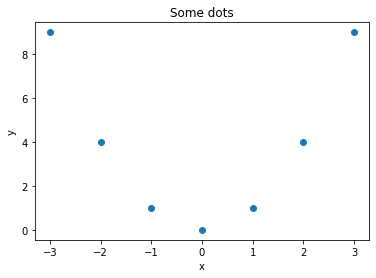

In [160]:
# Диаграмма рассеяния
plt.scatter(x, y)
plt.title('Some dots')
plt.xlabel('x')
plt.ylabel('y')

Text(0.5, 0, 'x')

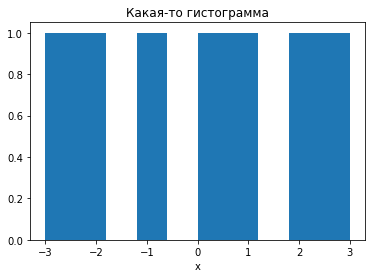

In [161]:
# Гистограмма
plt.hist(x)
plt.title('Какая-то гистограмма')
plt.xlabel('x')

## Seaborn

Загрузим данные.

In [162]:
Data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep=";")

**Задание 1.** Выведите на экран размеры таблицы

In [163]:
Data.shape

(891, 12)

## Обработка признаков и однофакторный анализ

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

In [164]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Задание 2.** Выведите основные числовые характеристики числовых столбцов.

In [165]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Функция не позволяет увидеть наличие пропусков в нечисловых столбцах.

**Обработаем признак 'Sex'**

**Задание 3.** Проверьте, есть ли пропуски в столбце.

In [166]:
# NA – явное пропущенное значение
# какое-то странное число / метка (например, отрицательные значения для возраста) – неявное пропущенное значение

In [167]:
Data['Sex'].isna().sum() # явных пропущенных значений нет

0

In [168]:
Data['Sex'].value_counts() # неявных пропущенных значений пять

male       574
female     312
unknown      5
Name: Sex, dtype: int64

**Задание 4.** Удалите пассажиров неизвестного пола, так как их всего 5.

In [169]:
# https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
Data = Data.drop(Data[Data['Sex'] == 'unknown'].index)

In [170]:
Data['Sex'].value_counts()

male      574
female    312
Name: Sex, dtype: int64

Признак 'Sex' является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать? 

**Задание 5.** Придумайте кодировку и сделайте её.

In [171]:
sex = Data['Sex'].copy()
sex[sex == 'male'] = 1
sex[sex == 'female'] = 0
Data['Sex'] = sex

In [172]:
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Graham; Miss. Margaret Edith,0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Behr; Mr. Karl Howell,1,26.0,0,0,111369,30.0000,C148,C


Посмотрим, как влияет пол на выживаемость.

Text(0.5, 1.0, 'Sex - Survived')

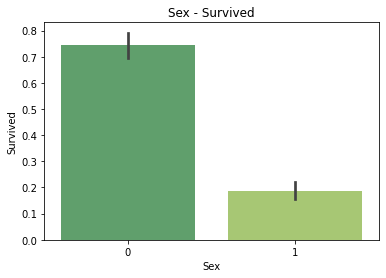

In [173]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
plt.title('Sex - Survived')

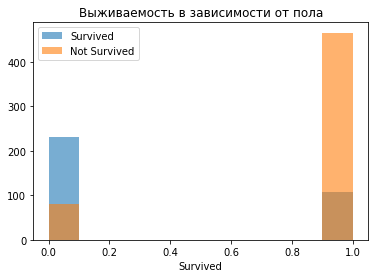

In [177]:
_ = plt.hist(Data.Sex[Data.Survived == 1], alpha = 0.6, label = 'Survived')
_ = plt.hist(Data.Sex[Data.Survived == 0], alpha = 0.6, label = 'Not Survived')
_ = plt.legend()
_ = plt.title('Выживаемость в зависимости от пола')
_ = plt.xlabel('Survived')

# NB: график не очень красивый, можно понастраивать и сделать лучше 

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

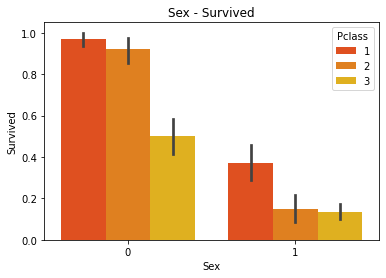

In [179]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show()

Ещё один полезный вид визуализации - ящик с усами. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

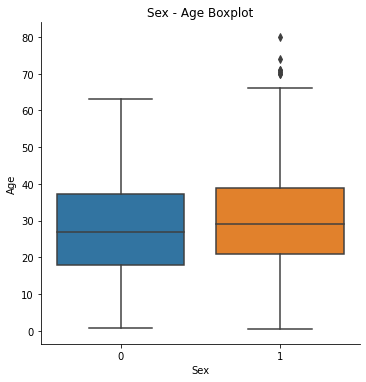

In [180]:
sns.catplot(x="Sex", y="Age", data=Data, kind="box")
plt.title('Sex - Age Boxplot')
plt.show()
# Boxplot: 
# центральная линия = медиана
# края "ящика" = 1-ый и 3-ий квантили (25% и 75% перцентили выборки)
# усы = 1.5 * (Q3 - Q1)
# точки = выбросы

Можно детализировать картинку, добавив разделение по Pclass.

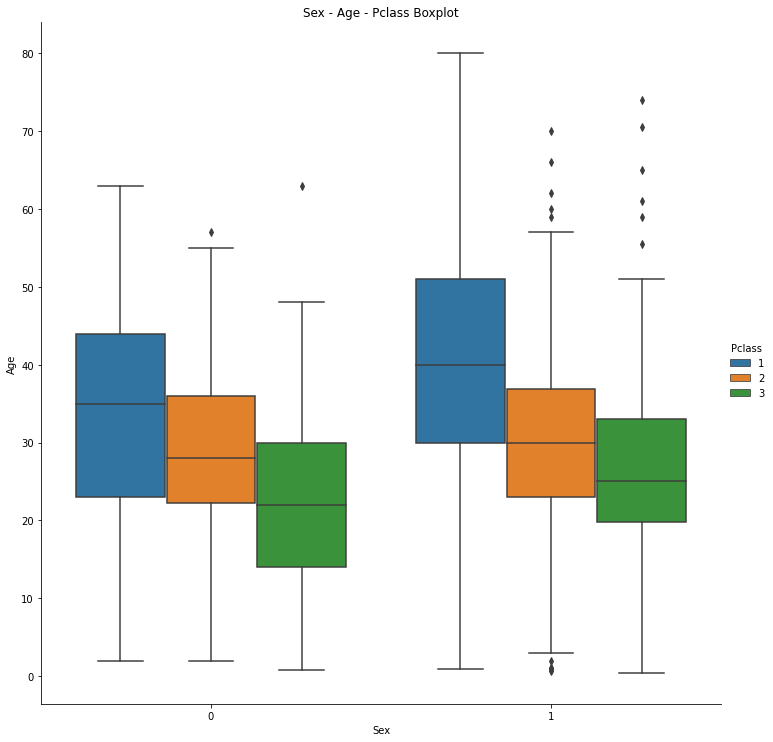

In [181]:
sns.catplot(x="Sex", y="Age",hue ="Pclass", data=Data, kind="box", height = 10)
plt.title('Sex - Age - Pclass Boxplot')
plt.show()

**Обработаем признак 'Embarked'**

In [182]:
print(Data['Embarked'].value_counts(dropna=False))
Data.shape

S      641
C      168
Q       75
NaN      2
Name: Embarked, dtype: int64


(886, 12)

**Задание 6.** Удалите из таблицы пассажиров, для которых неизвестен порт посадки (Embarked).

In [183]:
Data = Data.drop(Data[Data['Embarked'].isna()].index)

Переведем категориальный столбец в числовые с помощью OneHotEncoding, а именно, создадим три числовых столбца следующим образом:

In [ ]:
# One-hot encoding создаёт k новых столбцов, где k – число значений категориальной переменной.
# Если на наблюдении i категориальная переменная имела значение Q, то в новом столбце Q будет стоять 1, 
# а в прочих - 0.

# Пример. O - оригинальная категориальная переменная, S, C, Q - новые переменные после One-hot encoding
O S C Q
S 1 0 0
Q 0 0 1
S 1 0 0

In [ ]:
# Data['EmbS'] = Data.apply(lambda row: 1 if row.Embarked == 'S' else 0, axis=1)
# Data['EmbC'] = Data.apply(lambda row: 1 if row.Embarked == 'C' else 0, axis=1)
# Data['EmbQ'] = Data.apply(lambda row: 1 if row.Embarked == 'Q' else 0, axis=1)

Эту операцию можно сделать с помощью метода get_dummies.

In [184]:
dum = pd.get_dummies(Data['Embarked'])

**Задание 7.** Удалите из таблицы Data категориальный столбец Embarked и добавьте в неё новые столбцы, полученные с помощью get_dummies.

In [185]:
Data.drop('Embarked', axis = 1, inplace = True)

In [186]:
Data = pd.concat((Data, dum), axis = 1)

In [187]:
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,1,27.0,0,0,211536,13.0000,NaN,0,0,1
887,888,1,1,Graham; Miss. Margaret Edith,0,19.0,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,Behr; Mr. Karl Howell,1,26.0,0,0,111369,30.0000,C148,1,0,0


**Обработаем признак 'Age'**

Проверьте, если ли в Age пропущенные значения.

In [188]:
Data.Age.isna().sum()

175

Заполним пропуски медианным значением Age.

In [189]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

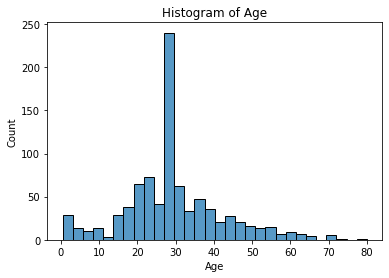

In [191]:
# Первый способ
sns.histplot(Data['Age'], kde=False)
plt.title('Histogram of Age')
plt.show()

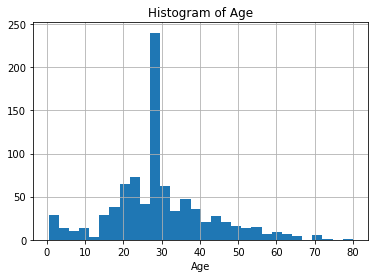

In [195]:
# Второй способ
_ = plt.hist(Data.Age, bins = 30)
_ = plt.title('Histogram of Age')
_ = plt.xlabel('Age')
_ = plt.grid()

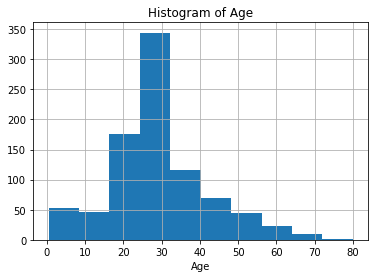

In [196]:
# Третий способ (метод pandas)
Data.Age.hist()
_ = plt.title('Histogram of Age')
_ = plt.xlabel('Age')

Посмотрим на распределение Age по классам.

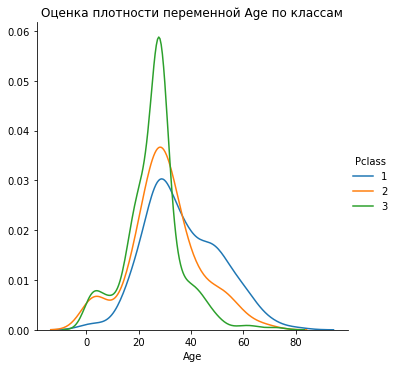

In [199]:
facet = sns.FacetGrid(data = Data, hue = "Pclass", legend_out=True, height = 5)
facet = facet.map(sns.kdeplot, "Age")
plt.title('Оценка плотности переменной Age по классам')
facet.add_legend();

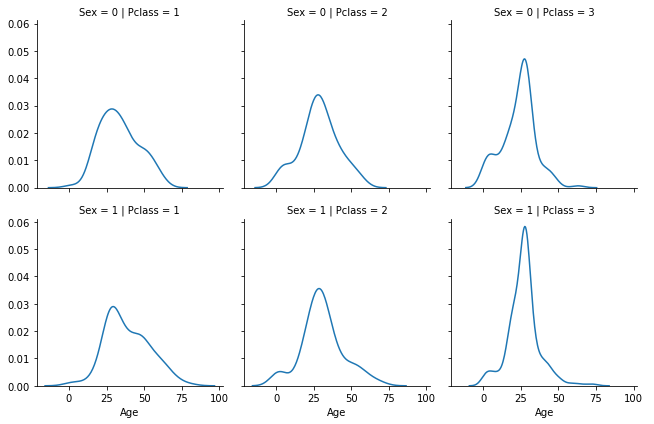

In [49]:
# Пример использования FacetGrid
facet = sns.FacetGrid(data = Data, col = "Pclass", row = 'Sex')
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

**Обработаем признак 'Fare'**

1) Проверьте, если ли в Fare пропущенные значения

2) Если пропущенные значения есть, заполните их медианным значением Fare

In [200]:
Data.Fare.isna().sum()

0

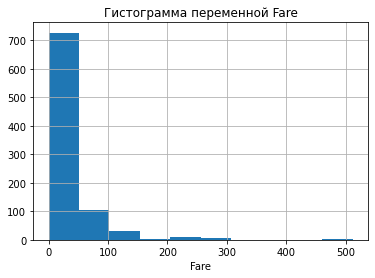

In [203]:
Data.Fare.hist()
_ = plt.title('Гистограмма переменной Fare')
_ = plt.xlabel('Fare')

In [204]:
Data.Fare.describe()

count    884.000000
mean      32.171422
std       49.822502
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [205]:
# Пропущенных значений нет, но есть интересные наблюдения:
(Data['Fare'] == 0).sum()

15

**Обработаем признак 'Pclass'**

Есть ли в Pclass пропущенные значения?

In [206]:
Data['Pclass'].value_counts(dropna=False)
# Нет

3    487
1    214
2    183
Name: Pclass, dtype: int64

**Задание 8.** Нарисуйте гистограмму выживаемости в зависимости от Pclass.

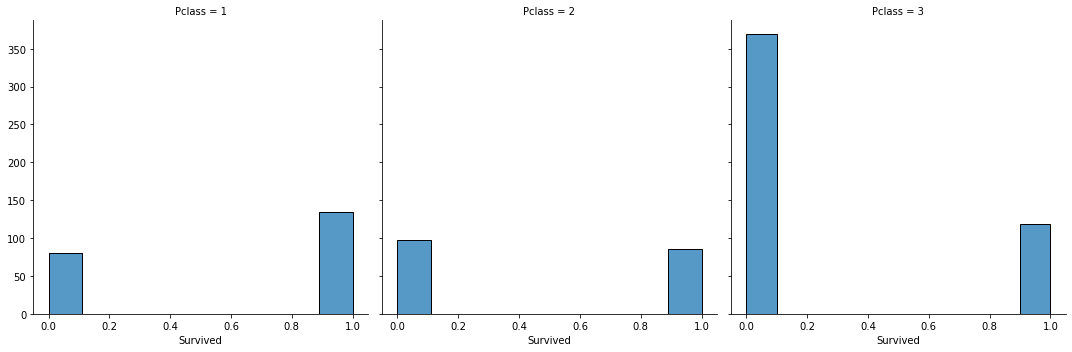

In [210]:
facet = sns.FacetGrid(data = Data, col = 'Pclass', height = 5, palette='summer')
facet = facet.map(sns.histplot, 'Survived')

Text(0.5, 1.0, 'Pclass = 3')

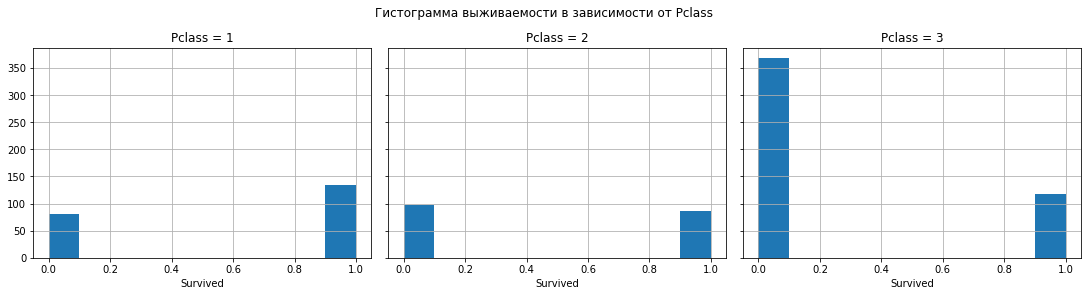

In [242]:
fig, ax = plt.subplots(1, 3, figsize = (15, 4), sharey = True, constrained_layout = True)
fig.suptitle('Гистограмма выживаемости в зависимости от Pclass')
ax[0].hist(Data.Survived[Data.Pclass == 1])
ax[1].hist(Data.Survived[Data.Pclass == 2])
ax[2].hist(Data.Survived[Data.Pclass == 3])
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[0].set_xlabel('Survived')
ax[1].set_xlabel('Survived')
ax[2].set_xlabel('Survived')
ax[0].set_title('Pclass = 1')
ax[1].set_title('Pclass = 2')
ax[2].set_title('Pclass = 3')

**Обработаем признак 'SibSp' (число братьев или сестер, мужей, жен)**

Есть ли в SibSp пропущенные значения?

In [243]:
Data['SibSp'].value_counts(dropna=False)
# Нет

0    603
1    207
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

**Обработаем признак 'Parch' (число родителей/детей)**

Есть ли в Parch пропущенные значения?

In [244]:
Data['Parch'].value_counts(dropna=False)
# Нет

0    673
1    118
2     79
3      5
5      4
4      4
6      1
Name: Parch, dtype: int64

**Задание 9.** Столбец PassengerId является категориальным и не несёт важной информации, удалите его.

In [245]:
Data.drop('PassengerId', axis = 1, inplace = True)

# Исследование признаков и feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной. 

**Задание 10.** Создайте таблицу NumericData, которая содержит только числовые столбцы из таблицы Data.

In [246]:
Data.Sex = Data.Sex.astype('int')

In [247]:
Data.dtypes[Data.dtypes != 'object'].index

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q',
       'S'],
      dtype='object')

In [248]:
#your code here

NumericData = Data[Data.dtypes[Data.dtypes != 'object'].index]

In [249]:
NumericData

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,1
888,0,3,0,28.0,1,2,23.4500,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,0,0


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

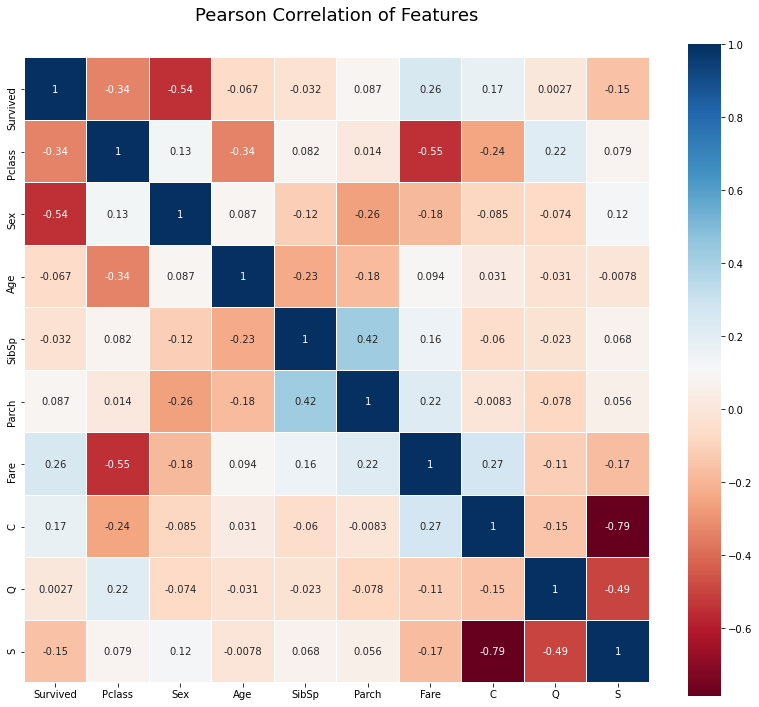

In [250]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Посмотрим на попарные зависимости некоторых признаков.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


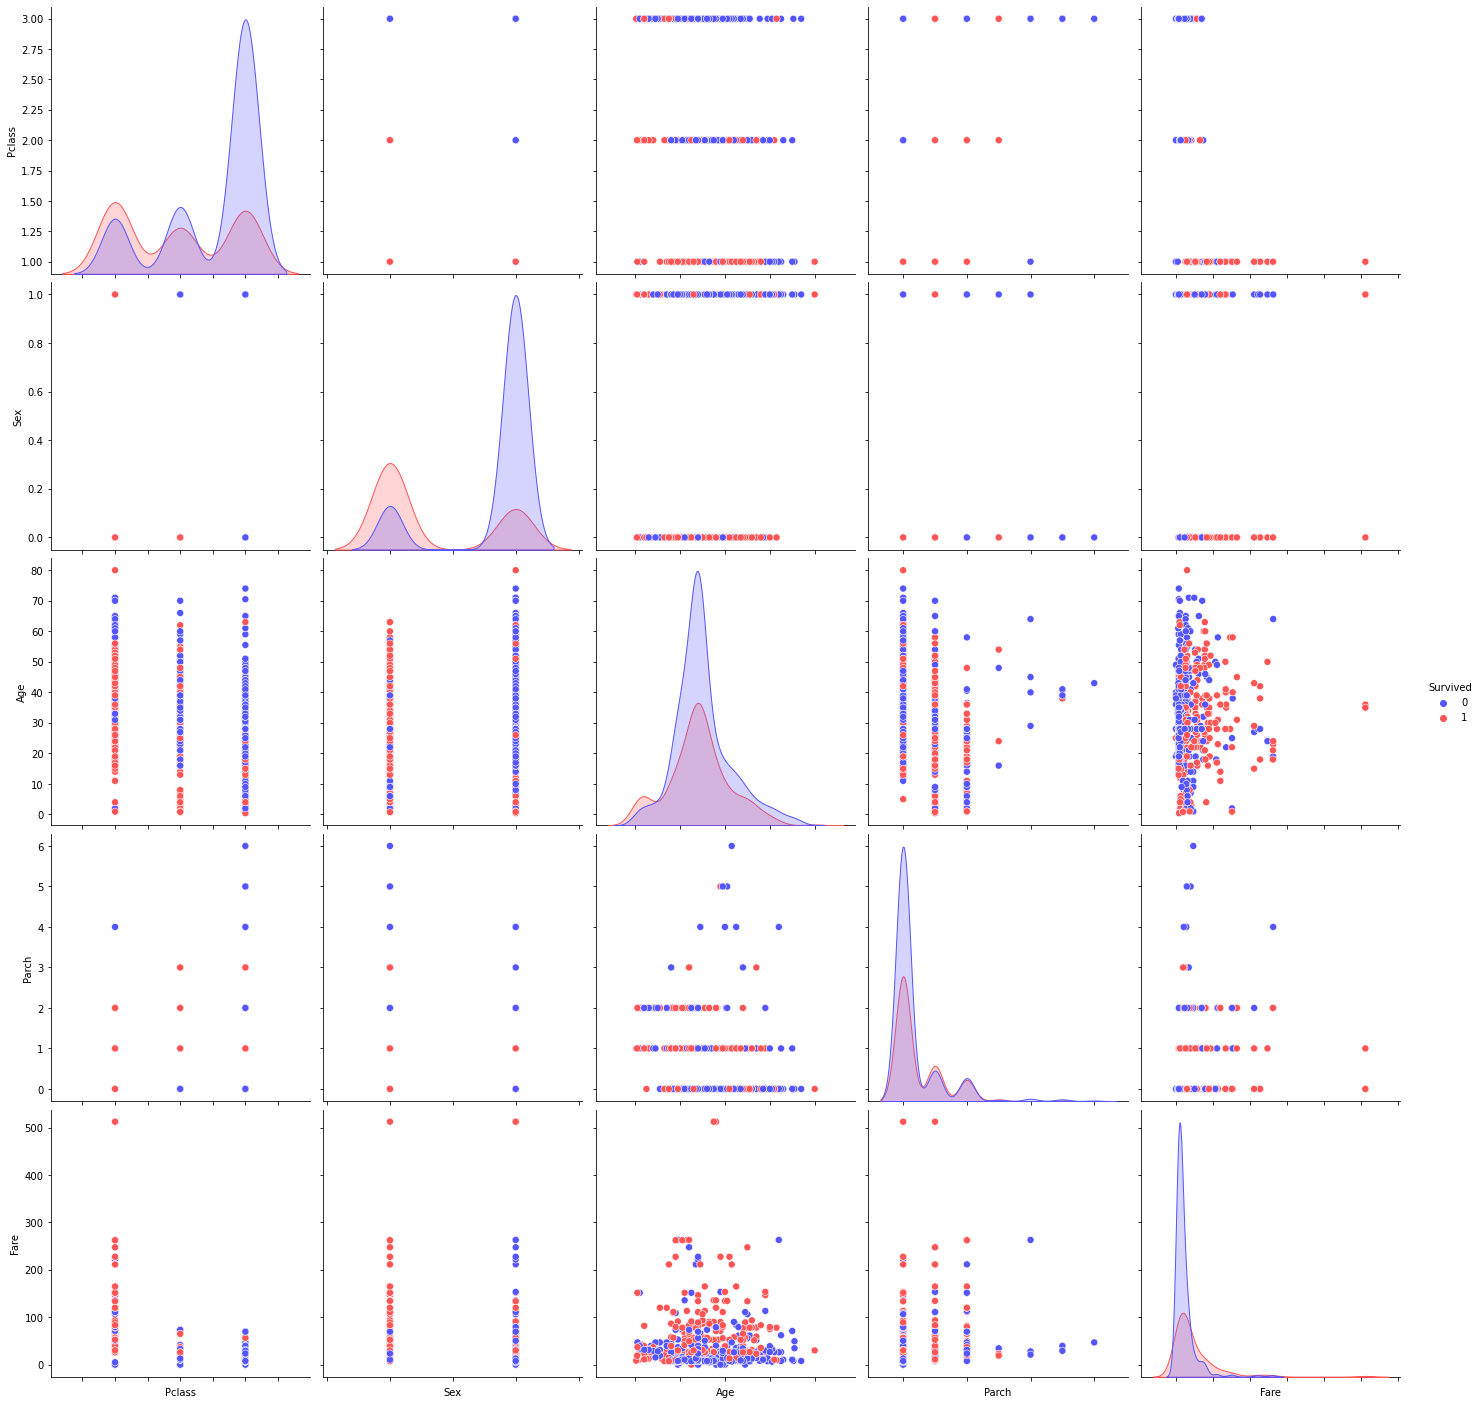

In [77]:
g = sns.pairplot(Data[['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare']], \
                 hue='Survived', palette = 'seismic', size=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки Age и Fare

* pd.cut - разбиение целочисленных данных на несколько интервалов по квантилям
* pd.qcut - разбиение числовых (не обязательно целочисленных) данных на несколько интервалов по квантилям

In [251]:
Data['AgeBin'] = pd.cut(Data['Age'].astype(int), 5)

Data['AgeBin'].head()

0    (16.0, 32.0]
1    (32.0, 48.0]
2    (16.0, 32.0]
3    (32.0, 48.0]
4    (32.0, 48.0]
Name: AgeBin, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

Теперь переведём полученные интервалы в числа, используя LabelEncoder.

In [252]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

Data['AgeBin_Code'] = label.fit_transform(Data['AgeBin'])

Data[['Age','AgeBin','AgeBin_Code']].head()

,Age,AgeBin,AgeBin_Code
0,22.0,"(16.0, 32.0]",1
1,38.0,"(32.0, 48.0]",2
2,26.0,"(16.0, 32.0]",1
3,35.0,"(32.0, 48.0]",2
4,35.0,"(32.0, 48.0]",2


In [253]:
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,AgeBin,AgeBin_Code
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,"(16.0, 32.0]",1
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,"(32.0, 48.0]",2
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,"(16.0, 32.0]",1
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,0,0,1,"(32.0, 48.0]",2
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,0,0,1,"(32.0, 48.0]",2


**Задание 11.** Бинаризуйте Fare, используя разбиение на 4 интервала.

In [254]:
Data['FareBin'] = pd.cut(Data['Fare'].astype(float), 4)

In [255]:
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,AgeBin,AgeBin_Code,FareBin
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,"(16.0, 32.0]",1,"(-0.512, 128.082]"
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,"(32.0, 48.0]",2,"(-0.512, 128.082]"
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,"(16.0, 32.0]",1,"(-0.512, 128.082]"
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,0,0,1,"(32.0, 48.0]",2,"(-0.512, 128.082]"
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,0,0,1,"(32.0, 48.0]",2,"(-0.512, 128.082]"


In [256]:
label = LabelEncoder()
Data['FareBin_Code'] = label.fit_transform(Data['FareBin'])

Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,AgeBin,AgeBin_Code,FareBin,FareBin_Code
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,"(16.0, 32.0]",1,"(-0.512, 128.082]",0
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,"(32.0, 48.0]",2,"(-0.512, 128.082]",0
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,"(16.0, 32.0]",1,"(-0.512, 128.082]",0
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,0,0,1,"(32.0, 48.0]",2,"(-0.512, 128.082]",0
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,0,0,1,"(32.0, 48.0]",2,"(-0.512, 128.082]",0


In [257]:
Data.shape

(884, 17)

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки Parch и SibSp слабо коррелируют с выживаемостью (Survived). Сконструируем новые признаки, чтобы решить эти вопросы.

**Задание 12.**

1) Создайте признак 'NameLen' и запишите в него длину имени (Name).

2) Создайте признак 'FamilySize', равный Parch + SibSp + 1. Зачем добавлять 1?

3) Создайте признак 'IsAlone', который показывает, путешествовал человек один или с семьей.

In [258]:
Data['NameLen'] = Data['Name'].apply(len)

In [259]:
Data['NameLen']

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: NameLen, Length: 884, dtype: int64

In [260]:
Data['FamilySize'] = Data['Parch'] + Data['SibSp'] + 1

In [261]:
Data['IsAlone'] = (Data['FamilySize'] == 1).astype(int)

In [262]:
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,AgeBin,AgeBin_Code,FareBin,FareBin_Code,NameLen,FamilySize,IsAlone
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,"(16.0, 32.0]",1,"(-0.512, 128.082]",0,23,2,0
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,"(32.0, 48.0]",2,"(-0.512, 128.082]",0,51,2,0
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,"(16.0, 32.0]",1,"(-0.512, 128.082]",0,22,1,1
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,0,0,1,"(32.0, 48.0]",2,"(-0.512, 128.082]",0,44,2,0
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,0,0,1,"(32.0, 48.0]",2,"(-0.512, 128.082]",0,24,1,1


**Задание 13.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом 'Survived'.

In [263]:
Data.dtypes

Survived           int64
Pclass             int64
Name              object
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
C                  uint8
Q                  uint8
S                  uint8
AgeBin          category
AgeBin_Code        int64
FareBin         category
FareBin_Code       int64
NameLen            int64
FamilySize         int64
IsAlone            int64
dtype: object

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

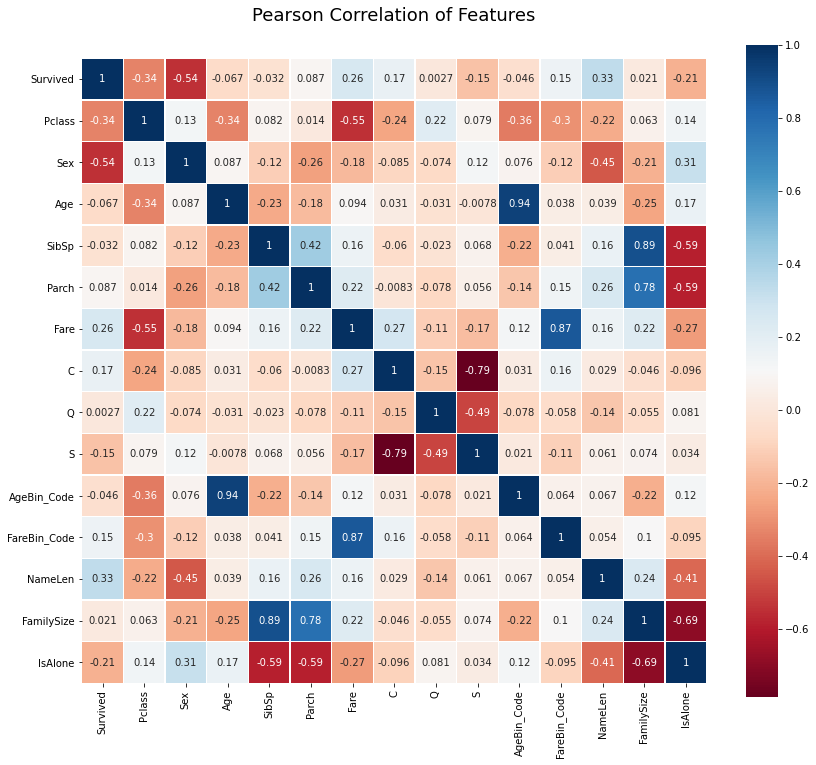

In [264]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(Data.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков. 

**Задание 14*.** Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [97]:
# Вывод ковариационной матрицы
Data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,AgeBin_Code,FareBin_Code,NameLen,FamilySize,IsAlone
Survived,1.000000,-0.335506,-0.543777,-0.067165,-0.032450,0.087297,0.256200,0.170666,0.002703,-0.151664,-0.046278,0.148764,0.334584,0.020647,-0.208351
Pclass,-0.335506,1.000000,0.129810,-0.338843,0.081720,0.013969,-0.548094,-0.244692,0.217939,0.079008,-0.356574,-0.299977,-0.221675,0.063049,0.139502
Sex,-0.543777,0.129810,1.000000,0.086858,-0.116404,-0.261302,-0.181285,-0.085112,-0.074009,0.120986,0.076239,-0.116067,-0.448019,-0.208590,0.309656
Age,-0.067165,-0.338843,0.086858,1.000000,-0.234719,-0.176253,0.093524,0.030847,-0.030963,-0.007783,0.938955,0.038469,0.038872,-0.248075,0.167622
SibSp,-0.032450,0.081720,-0.116404,-0.234719,1.000000,0.421809,0.160630,-0.060457,-0.023379,0.067719,-0.220015,0.040711,0.164937,0.894969,-0.585058
Parch,0.087297,0.013969,-0.261302,-0.176253,0.421809,1.000000,0.221926,-0.008326,-0.078248,0.056153,-0.138737,0.145946,0.259406,0.782003,-0.586605
Fare,0.256200,-0.548094,-0.181285,0.093524,0.160630,0.221926,1.000000,0.270267,-0.114707,-0.165913,0.121268,0.865839,0.156199,0.219618,-0.274700
C,0.170666,-0.244692,-0.085112,0.030847,-0.060457,-0.008326,0.270267,1.000000,-0.147487,-0.786727,0.031043,0.160994,0.028655,-0.045656,-0.096018
Q,0.002703,0.217939,-0.074009,-0.030963,-0.023379,-0.078248,-0.114707,-0.147487,1.000000,-0.494518,-0.077866,-0.058287,-0.138802,-0.054572,0.081141
S,-0.151664,0.079008,0.120986,-0.007783,0.067719,0.056153,-0.165913,-0.786727,-0.494518,1.000000,0.021319,-0.105100,0.061449,0.074181,0.033736


In [266]:
# Добавим, например, квадрат возраста
# Возможное объяснение: дети и пожилые люди в среднем менее выносливы, чем люди среднего возраста,
# а потому вероятность спасения последних выше
# NB: не факт, что пояснение "правильно": помогает ли данная переменная в предсказаниях или нет мы определим 
# дальше, анализируя корреляции и изучая результаты работы моделей
# Главное – что это возможная логично поставленная гипотеза
Data['AgeSq'] = Data['Age'] ** 2

**Задание 15.** Верно ли, что если признак имеет маленькую по модулю корреляцию с выживаемостью, то это означает, что он не влияет на выживаемость и бесполезен для нашей задачи?

In [ ]:
# Неверно по двум причинам:
# 1) Корреляция - мера линейной зависимости, а зависимость может быть нелинейной. В этом случае ковариация
# вполне может быть близка к нулю, однако признак не будет являться бесполезным
# 2) Корреляция Пирсона создана для расчёта меры линейной связи между непрерывными переменными. 
# Для расчёта линейной связи между категориальными переменными или непрерывной и категориальной существуют
# другие, специальные, коэффициенты и методы. Поэтому число, посчитанное по формуле корреляции Пирсона для,
# например, непрерывной и категориальной переменной не будет являться осмысленным показателем линейной связи.
# Тем не менее, признак всё равно может быть полезен для предсказания, но коэффициент может этого не отражать